# DKN
### Regression Model
$y_i = \langle X_i, \ C \rangle + \epsilon_i, \quad i=1, \ldots, n.$
- $y_i \in \mathbb{R}, X_i \in \mathbb{R}^{P \times D}, C \in \mathbb{R}^{P \times D}$
- $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$

In [4]:
import sys
sys.path.append('../')
import numpy as np
import pandas as pd
from operators import *
from Gnrt_data import *
import matplotlib.pyplot as plt
from DKN_pro import DKN_R
from sklearn.metrics import mean_squared_error

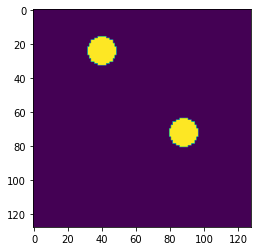

In [5]:
task = 'reg'
num_of_Circles = 2
D, P = 128, 128
n, r = 1000, 0.8
N = int(n / r)
SoN = 1

centers = [(24, 40), (72, 88)]
radiuses = [8, 8]
C = Gnrt_circles((D, P), centers, radiuses)
plt.imshow(C)
plt.show()

In [6]:
X, Y = Gnrt_data(C, N, sigma_of_X=1, sigma_of_noise=SoN)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=r, random_state=0)
print('Data | Sample size | Train: {}, Test: {}'.format(len(Y_train), len(Y_test)))
print('Y | S.D. | Train: {:.1f}, Test: {:.1f}'.format(Y_train.std(), Y_test.std()))

Data | Sample size | Train: 1000, Test: 250
Y | S.D. | Train: 20.1, Test: 20.9


In [7]:
L = 7
blockshapes = [[2, 2] for i in range(L)]
R_list = [1, 2, 3]
Rcd_list = []
for R in R_list:
    alg_name = 'DKN-' + str(R)
    print(f'\033[7m{alg_name}...\033[0m')

    dkn = DKN_R(blockshapes, task=task, R=R)
    C_hat, loss_list = dkn.fit((X_train, Y_train), (X_test, Y_test))

    # Estimation Error
    rmse = mean_squared_error(C, C_hat, squared=False)
    print('For C | RMSE: {:.4f}'.format(rmse))
    # Prediction Error
    # Train
    Y_inhat = dkn.predict(X_train)
    Train_rmse = mean_squared_error(Y_train, Y_inhat, squared=False)
    # Test
    Y_outhat = dkn.predict(X_test)
    Test_rmse = mean_squared_error(Y_test, Y_outhat, squared=False)
    print('For Y | Train RMSE: {:.4f}, Test RMSE: {:.4f}'.format(Train_rmse, Test_rmse))

    p = np.sum([np.prod(b) for b in blockshapes])
    BIC = n * np.log(Train_rmse ** 2) + R * p * np.log(n)
    print('BIC: {:.4f}'.format(BIC))

    itrs = len(loss_list[0])

    Rcd = [R, R * p, [rmse, Train_rmse, Test_rmse], BIC, C_hat, itrs]
    Rcd_list.append(Rcd)

Nop_list = [rcd[1] for rcd in Rcd_list]
RMSEs_list = [rcd[2] for rcd in Rcd_list]
BIC_list = [rcd[3] for rcd in Rcd_list]
C_list = [rcd[4] for rcd in Rcd_list]
Itrs_list = [rcd[-1] for rcd in Rcd_list]

DKN-1...
Initialization Finished. Start Computing...
Training loss converges at iteration 4.alid: 16.4785
For C | RMSE: 0.0683
For Y | Train RMSE: 16.0294, Test RMSE: 16.4785
BIC: 5742.2702
DKN-2...
Initialization Finished. Start Computing...
Training loss converges at iteration 8.lid: 10.39446
For C | RMSE: 0.0436
For Y | Train RMSE: 9.4630, Test RMSE: 10.3944
BIC: 4881.6034
DKN-3...
Initialization Finished. Start Computing...
For C | RMSE: 0.0506| Train: 9.2032, Valid: 10.39217
For Y | Train RMSE: 9.2032, Test RMSE: 10.3921
BIC: 5019.3508


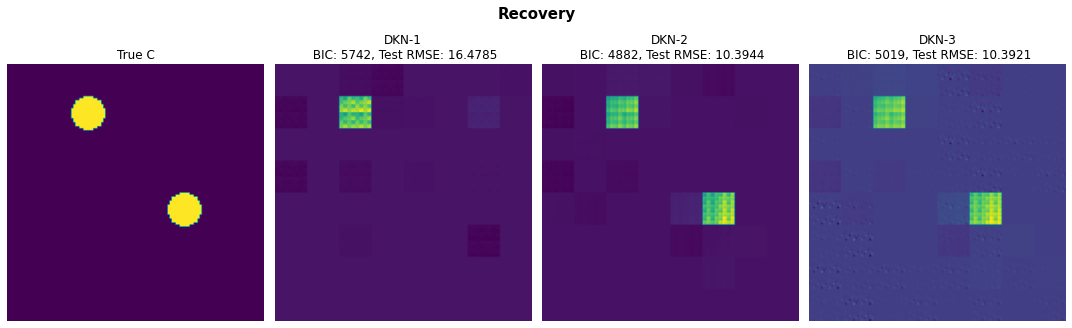

In [8]:
plt.figure(figsize=(5 * len(R_list), 5))
plt.suptitle('Recovery', fontsize=15, fontweight='bold')
plt.subplot(1, len(R_list)+1, 1)
plt.imshow(C)
plt.title('True C')
plt.axis('off')
for R in R_list:
    plt.subplot(1, len(R_list)+1, R+1)
    plt.imshow(C_list[R-1])
    plt.title(f'DKN-{R}\n BIC: {BIC_list[R-1]:.0f}, Test RMSE: {RMSEs_list[R-1][2]:.4f}')
    plt.axis('off')
plt.tight_layout()
plt.show()

table = pd.DataFrame(RMSEs_list)
table.columns = ['RMSE', 'Train_RMSE', 'Test_RMSE']
table.index = ['DKN-1', 'DKN-2', 'DKN-3']
table['BIC'] = BIC_list